In [116]:
import re
import glob
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statistics import mean,stdev
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

## Data Exploration and Pre-processing

In [117]:
# b(i)-(iii)
neg_files = glob.glob('C:\\Users\\win10\\Desktop\\Final\\neg\\cv*.txt')
pos_files = glob.glob('C:\\Users\\win10\\Desktop\\Final\\pos\\cv*.txt')
label_path = {1:[i for i in pos_files],0:[i for i in neg_files]}

In [118]:
pos_lst = [i for i in pos_files]
pos_txt = []
for i in pos_lst:
    f = open(i, "r",encoding='utf-8')
    content = f.read()
    no_punc = re.sub('[^a-zA-Z]', ' ', content)
    no_num = re.sub(r'[\d+]', '', no_punc).split()
    pos_txt = pos_txt + no_num
# print(pos_txt)

In [119]:
neg_lst = [i for i in neg_files]
neg_txt = []
for i in neg_lst:
    f = open(i, "r",encoding='utf-8')
    content = f.read()
    no_punc = re.sub('[^a-zA-Z]', ' ', content)
    no_num = re.sub(r'[\d+]', '', no_punc).split()
    neg_txt = neg_txt + no_num
#print(neg_txt)

In [120]:
# Split training and test data
train_files = neg_files[:700] + pos_files[:700] # len(trainn_data):1400
test_files = neg_files[700:] + pos_files[700:] # len(test_data):600

In [121]:
train_word = []
for i in train_files:
    f = open(i,"r",encoding='utf-8')
    content = f.read()
    no_punc = re.sub('[^a-zA-Z]', ' ', content)
    no_num = re.sub(r'[\d+]', '', no_punc)
    train_word = train_word + no_num.split()


In [122]:
test_word = []
for i in test_files:
    f = open(i,"r",encoding='utf-8')
    content = f.read()
    no_punc = re.sub('[^a-zA-Z]', ' ', content)
    no_num = re.sub(r'[\d+]', '', no_punc)
    test_word = test_word + no_num.split()
#print(test_word)

In [ ]:
# b(iv) Count the number of unique words in the whole dataset (train + test)

word_lst = train_word + test_word
tokenizer = Tokenizer()
tokenizer.fit_on_texts(word_lst)

In [125]:
unique_count = len(tokenizer.word_counts)
print('The number of unique words:',unique_count)

The number of unique words: 38911


In [127]:
# b(v) Calculate the average review length and the standard deviation of review lengths.
files = train_files + test_files
review_len = []
for i in files:
    with open(i,"r",encoding='utf-8') as file:
        content = file.read().split("\n")
        
    item = ""
    for j in content:
        item = item + j
        
    no_punc = re.sub(r'[^\w\s+]', '',item)
    no_num = re.sub(r'[\d+]', '', no_punc).split()
    
    review_len.append(len(no_num))

print('average review length:', mean(review_len),'\n','standard deviation:',stdev(review_len))

average review length: 644.3575 
 standard deviation: 285.05139508985275


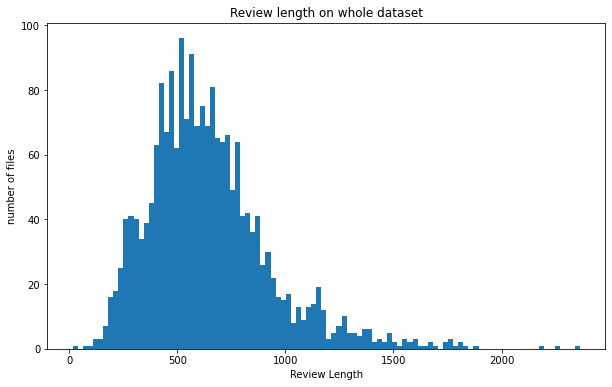

In [128]:
# b(vi) Plot the histogram of review lengths.
fig, ax = plt.subplots(figsize =(10, 6))
ax.hist(review_len, bins=100)
# plt.hist(review_len, bins=100)
plt.xlabel('Review Length')
plt.ylabel('number of files')
plt.title('Review length on whole dataset')

plt.show()

In [129]:
# b(vii) Tokenize each text document.

In [130]:
# train_txt tokenize

In [131]:
train_txt = []
for i in train_files:
    with open(i,"r",encoding='utf-8') as file:
        content = file.read().split("\n")
        
    item = ""
    for j in content:
        item = item + j
        
    no_punc = re.sub(r'[^\w\s+]', '',item)
    no_num = re.sub(r'[\d+]', '', no_punc)
    
    train_txt.append(str(no_num))

In [132]:
train_token = Tokenizer() # create the tokenizer
train_token.fit_on_texts(train_txt)
#print(train_token.word_index)

In [133]:
# test_txt tokenize

In [134]:
test_txt = []
for i in test_files:
    with open(i,"r",encoding='utf-8') as file:
        content = file.read().split("\n")
        
    item = ""
    for j in content:
        item = item + j
        
    no_punc = re.sub(r'[^\w\s+]', '',item)
    no_num = re.sub(r'[\d+]', '', no_punc)
    
    test_txt.append(str(no_num))


In [135]:
test_token = Tokenizer() # create the tokenizer
test_token.fit_on_texts(test_txt)
#print(test_token.word_index)

In [136]:
# b(viii)-(ix) 
# Select a review length L that 70% of the reviews have a length below it.
# Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L       

In [137]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

In [138]:
L_70 = sorted(review_len)[1400] # 737
L_90 = sorted(review_len)[1800] # 997
trun_lst = [L_70 if i> L_70 else i for i in review_len]

# train set
train_encoded = [one_hot(i,n = len(unique_lst)) for i in train_txt]
# test set
test_encoded = [one_hot(i,n = len(unique_lst)) for i in test_txt]

In [139]:
# zero-pad reviews
train_padded = pad_sequences(train_encoded, maxlen = L_70)
test_padded = pad_sequences(test_encoded, maxlen = L_70)

##  Word Embeddings

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [141]:
# negative sentiment labelled as 0
neg_labels = np.zeros(1000)
train_neg_labels = neg_labels[:700]
test_neg_labels = neg_labels[700:]

# positive sentiment labelled as 1
pos_labels = np.ones(1000)
train_pos_labels = pos_labels[:700]
test_pos_labels = pos_labels[700:]


In [142]:
# combine negative and positive in train set: Y
train_labels = np.concatenate((train_neg_labels, train_pos_labels))
test_labels = np.concatenate((test_neg_labels, test_pos_labels))

#y_train = pd.DataFrame(train_labels)
#y_test = pd.DataFrame(test_labels)

In [143]:
# encode train x and test x with top_word=5000: X
train_encoded = [one_hot(i,n = 5000) for i in train_txt]
test_encoded = [one_hot(i,n = 5000) for i in test_txt]

train_padded = pad_sequences(train_encoded, maxlen = L_70)
test_padded = pad_sequences(test_encoded, maxlen = L_70)

In [144]:
# c (i) Define the model
# model.add(Embedding(top words, 32, input length=max words)), where top_words=5,000 and max words=L.
# in this case, L = L_70
model = Sequential()
model.add(Embedding(5001, 32, input_length= L_70))

# c (ii) Flatten the matrix of each document to a vector
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_x = train_padded
train_y = train_labels
model.fit(train_x, train_y, epochs=2, verbose=0)
loss, accuracy = model.evaluate(train_x, train_y)
print('Accuracy: %f' % (accuracy*100))

44/44 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.9671
Accuracy: 96.714288


In [145]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 737, 32)           160032    
                                                                 
 flatten_14 (Flatten)        (None, 23584)             0         
                                                                 
 dense_61 (Dense)            (None, 1)                 23585     
                                                                 
Total params: 183,617
Trainable params: 183,617
Non-trainable params: 0
_________________________________________________________________


In [146]:
'''
Reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
           https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/22_word_embedding/supervised_word_embeddings.ipynb
           https://www.youtube.com/watch?v=Wp-Wb456kSU
'''

'\nReference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/\n           https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/22_word_embedding/supervised_word_embeddings.ipynb\n           https://www.youtube.com/watch?v=Wp-Wb456kSU\n'

## Multi-Layer Perceptron

In [147]:
from tensorflow.keras import layers
from keras.layers import Dropout

In [148]:
# d (i) Train a MLP with 3 (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. 
#       Use a dropout rate of 20% for the first layer and 50% for the other layers. 
#       Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). 
#       To avoid overfitting, just set the number of epochs as 2. 
#       Use a batch size of 10

In [149]:
# Building the model
model = Sequential()
model.add(Embedding(5001, 32, input_length= L_70))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2)) # tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 737, 32)           160032    
                                                                 
 flatten_15 (Flatten)        (None, 23584)             0         
                                                                 
 dense_62 (Dense)            (None, 50)                1179250   
                                                                 
 dropout_40 (Dropout)        (None, 50)                0         
                                                                 
 dense_63 (Dense)            (None, 50)                2550      
                                                                 
 dropout_41 (Dropout)        (None, 50)                0         
                                                                 
 dense_64 (Dense)            (None, 50)              

In [150]:
# Training the model
train_x = train_padded
train_y = train_labels

test_x = test_padded
test_y = test_labels

model.fit(train_x,train_y,epochs = 2, batch_size = 10, verbose = 1,validation_data = (test_x,test_y))
loss, accuracy = model.evaluate(train_x, train_y)
print('Accuracy: %f' % (accuracy*100))

Epoch 1/2
140/140 [==============================] - 2s 8ms/step - loss: 0.6993 - accuracy: 0.5221 - val_loss: 0.6902 - val_accuracy: 0.5517
Epoch 2/2
44/44 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.9314
Accuracy: 93.142855


In [151]:
# Test the model
loss,accuracy = model.evaluate(test_x,test_y)
print('Test Accuracy: %f' % (accuracy*100))

19/19 [==============================] - 0s 5ms/step - loss: 0.6455 - accuracy: 0.6467
Test Accuracy: 64.666665


In [152]:
'''
Reference: https://github.com/KirillShmilovich/MLP-Neural-Network-From-Scratch/blob/master/MLP.ipynb
           https://github.com/rishabhrastogi31/student-admission-classifier-based-on-MLP-KERAS/blob/master/StudentAdmissionsKeras.ipynb
'''

'\nReference: https://github.com/KirillShmilovich/MLP-Neural-Network-From-Scratch/blob/master/MLP.ipynb\n           https://github.com/rishabhrastogi31/student-admission-classifier-based-on-MLP-KERAS/blob/master/StudentAdmissionsKeras.ipynb\n'

## One-Dimensional Convolutional Neural Network

In [153]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [154]:
# e (i) After the embedding layer, insert a Conv1D layer. 
#      This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, 
#      i.e. reads embedded word representations 3 vector elements of the word embedding at a time. 
#      The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 
#      The rest of the network is the same as the neural network above

In [155]:
model = Sequential()
model.add(Embedding(5001, 32, input_length= L_70))
model.add(Conv1D(32,kernel_size = 3))
model.add(MaxPooling1D(pool_size=2,strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(train_x,train_y,epochs = 2, batch_size = 10, verbose = 1)
loss, accuracy = model.evaluate(train_x, train_y)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 737, 32)           160032    
                                                                 
 conv1d_8 (Conv1D)           (None, 735, 32)           3104      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 367, 32)          0         
 1D)                                                             
                                                                 
 flatten_16 (Flatten)        (None, 11744)             0         
                                                                 
 dense_66 (Dense)            (None, 50)                587250    
                                                                 
 dropout_43 (Dropout)        (None, 50)                0         
                                                     

In [156]:
# Test the model
loss,accuracy = model.evaluate(test_x,test_y)
print('Test Accuracy: %f' % (accuracy*100))

19/19 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.5983
Test Accuracy: 59.833336


In [157]:
def cnn_model(train_x,train_y,test_x,test_y):
    verbose, epochs, batch_size = 1, 2, 10
    model = Sequential()
    model.add(Embedding(5001, 32, input_length= L_70))
    model.add(Conv1D(32,kernel_size = 3))
    model.add(MaxPooling1D(pool_size=2,strides=2, padding='valid'))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_x,train_y,epochs = epochs, batch_size = batch_size, verbose = verbose)
    loss, accuracy = model.evaluate(train_x, train_y)
    print('Accuracy: %f' % (accuracy*100))
    test_loss,test_accuracy = model.evaluate(test_x,test_y)
    print('Test Accuracy: %f' % (test_accuracy*100))
    

In [158]:
cnn_model(train_x,train_y,test_x,test_y)

Epoch 1/2
140/140 [==============================] - 2s 9ms/step - loss: 0.6962 - accuracy: 0.5121
Epoch 2/2
44/44 [==============================] - 0s 5ms/step - loss: 0.5519 - accuracy: 0.8379
Accuracy: 83.785713
19/19 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.5917
Test Accuracy: 59.166664


In [159]:
'''
Reference: https://keras.io/api/layers/pooling_layers/max_pooling1d/
           https://keras.io/api/layers/convolution_layers/convolution1d/
           https://github.com/Gruschtel/1D-CNN/blob/master/1D_CNN_01.ipynb
           https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
'''

'\nReference: https://keras.io/api/layers/pooling_layers/max_pooling1d/\n           https://keras.io/api/layers/convolution_layers/convolution1d/\n           https://github.com/Gruschtel/1D-CNN/blob/master/1D_CNN_01.ipynb\n           https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/\n'

## Long Short-Term Memory Recurrent Neural Network

In [160]:
from tensorflow.keras.layers import LSTM

In [161]:
# f (i) Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. 
#       Use a dropout rate of 0.2 for both LSTM and the dense layer. 
#       Train the model using 10-50 epochs and batch size of 10.

In [162]:
# Choose the epoch size = 15
def lstm_model(train_x,train_y,test_x,test_y):
    verbose, batch_size = 1, 10
    
    model = Sequential()
    model.add(Embedding(5001, 32, input_length= L_70))
    model.add(LSTM(32, dropout=0.2))
    model.add(Dense(256,activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    model.fit(train_x,train_y, epochs = 15, batch_size = batch_size, verbose = verbose,validation_data = (test_x,test_y))
    
    loss, accuracy = model.evaluate(train_x, train_y)
    print('Accuracy: %f' % (accuracy*100))
    test_loss,test_accuracy = model.evaluate(test_x,test_y)
    print('Test Accuracy: %f' % (test_accuracy*100))

In [163]:
lstm_model(train_x,train_y,test_x,test_y)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 737, 32)           160032    
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dense_74 (Dense)            (None, 256)               8448      
                                                                 
 dropout_49 (Dropout)        (None, 256)               0         
                                                                 
 dense_75 (Dense)            (None, 1)                 257       
                                                                 
Total params: 177,057
Trainable params: 177,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
140/140 [===========================

In [114]:
# Train the model using 10-50 epochs and batch size of 10.
def lstm_model_lst(train_x,train_y,test_x,test_y):
    epochs_lst = [10,20,30,40,50]
    verbose, batch_size = 0, 10
    
    for epoch in epochs_lst:
        model = Sequential()
        model.add(Embedding(5001, 32, input_length= L_70))
        model.add(LSTM(32,dropout=0.2))
        model.add(Dense(256,activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(train_x,train_y, epochs = epoch, batch_size = batch_size, verbose = verbose)
    
        loss, accuracy = model.evaluate(train_x, train_y)
        print('Accuracy: %f' % (accuracy*100))
        test_loss,test_accuracy = model.evaluate(test_x,test_y)
        print('Test Accuracy: %f' % (test_accuracy*100))

In [115]:
lstm_model_lst(train_x,train_y,test_x,test_y)

44/44 [==============================] - 2s 46ms/step - loss: 4.5660e-04 - accuracy: 1.0000
Accuracy: 100.000000
19/19 [==============================] - 1s 46ms/step - loss: 1.7617 - accuracy: 0.7133
Test Accuracy: 71.333331
44/44 [==============================] - 2s 46ms/step - loss: 5.9253e-06 - accuracy: 1.0000
Accuracy: 100.000000
19/19 [==============================] - 1s 57ms/step - loss: 2.1362 - accuracy: 0.7000
Test Accuracy: 69.999999
44/44 [==============================] - 3s 55ms/step - loss: 3.2894e-06 - accuracy: 1.0000
Accuracy: 100.000000
19/19 [==============================] - 1s 44ms/step - loss: 2.6725 - accuracy: 0.6767
Test Accuracy: 67.666668
44/44 [==============================] - 2s 47ms/step - loss: 5.1804e-07 - accuracy: 1.0000
Accuracy: 100.000000
19/19 [==============================] - 1s 46ms/step - loss: 2.2918 - accuracy: 0.7317
Test Accuracy: 73.166668
44/44 [==============================] - 3s 48ms/step - loss: 2.3403e-07 - accuracy: 1.0000
Accu

In [ ]:
'''
Reference: http://colah.github.io/posts/2015-08-Understanding-LSTMs/
'''